In [32]:
# for colab
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# import os
# os.chdir('/content/drive/MyDrive/Monthly_Workout')
#!pip install pycaret

# Enable pycaret for colab
# from pycaret.utils import enable_colab
# enable_colab()

In [33]:
import pandas as pd
import numpy as np

In [34]:
# 데이터 불러오기
X_train = pd.read_csv('./data/train_features.csv')
y_train = pd.read_csv('./data/train_labels.csv')
X_test = pd.read_csv('./data/test_features.csv')
display(X_train.head())
display(y_train.head())
display(X_test.head())

id  time     acc_x     acc_y     acc_z      gy_x       gy_y       gy_z
0   0     0  1.206087 -0.179371 -0.148447 -0.591608 -30.549010 -31.676112
1   0     1  1.287696 -0.198974 -0.182444  0.303100 -39.139103 -24.927216
2   0     2  1.304609 -0.195114 -0.253382 -3.617278 -44.122565 -25.019629
3   0     3  1.293095 -0.230366 -0.215210  2.712986 -53.597843 -27.454013
4   0     4  1.300887 -0.187757 -0.222523  4.286707 -57.906561 -27.961234

id  label                 label_desc
0   0     37  Shoulder Press (dumbbell)
1   1     26               Non-Exercise
2   2      3         Biceps Curl (band)
3   3     26               Non-Exercise
4   4     26               Non-Exercise

id  time     acc_x     acc_y     acc_z       gy_x       gy_y       gy_z
0  3125     0 -0.628100 -0.160155  0.151487  49.665357  88.435961  13.597668
1  3125     1 -0.462548  0.012462 -0.053726  56.953059  96.185341  16.278458
2  3125     2 -0.363481 -0.091789 -0.130004  29.557396  93.836453  13.329043
3  3125     3 -0.351750 -0.239870 -0.193053  23.686172  88.608721  13.449771
4  3125     4 -0.312934 -0.123762 -0.318621  20.410071  85.327707  13.884912

1. Make Pivot Table

- 현재 데이터가 3125명 * 600개의 log 로 구성되어 있습니다.  
- Machine Learning Model에 넣기 위해서는 데이터를 집약해서 한명의 id에 데이터를 집약적으로 넣어야 합니다.  
- 따라서 첫번째로 Pandas에서 지원하는 Pivot Table Method를 이용합니다.

In [35]:
# X_train 의 데이터를 통해서 id와 time을 제외한 feature를 대상으로 id를 기준으로 잡아
# 합, 평균, 중앙값, 최소값, 최대값, 보정 표본 표준편차, 비편향 편차의 값을 구합니다.

X_pivot_train = pd.pivot_table(data=X_train, values=X_train.columns[2:], 
                               index='id', 
                               aggfunc = ['sum','mean', 'median','min','max', 'std','var']
                               )

X_pivot_test = pd.pivot_table(data = X_test, values = X_test.columns[2:], 
                              index = 'id', 
                              aggfunc = ['sum','mean', 'median','min','max', 'std','var']
                              )

display(X_pivot_train.head(3))
display(X_pivot_test.head(3))

sum                                                                 \
         acc_x       acc_y       acc_z         gy_x         gy_y         gy_z   
id                                                                              
0   558.797337 -131.082711 -222.252919 -1119.161589 -2015.703683   709.264425   
1  -459.948117 -190.354639   -2.534051  6642.960123  1044.284884   835.976169   
2    23.901616  -49.441742  375.607013 -5083.770868   358.725917  1831.974458   

        mean                                 ...       std             \
       acc_x     acc_y     acc_z       gy_x  ...     acc_z       gy_x   
id                                           ...                        
0   0.931329 -0.218471 -0.370422  -1.865269  ...  0.135131  13.284216   
1  -0.766580 -0.317258 -0.004223  11.071600  ...  0.499395  79.244561   
2   0.039836 -0.082403  0.626012  -8.472951  ...  0.248807  25.422926   

                                var                                   \
          gy_y       gy_z     acc_x     acc_y     acc_z         gy_x   
id                                                                     
0    24.300479  25.275185  0.036664  0.031375  0.018260   176.470384   
1    96.005289  75.545343  0.245548  0.113175  0.249396  6279.700472   
2   118.956646  13.920337  0.506904  0.021646  0.061905   646.325142   

                               
            gy_y         gy_z  
id                             
0     590.513292   638.834979  
1    9217.015511  5707.098884  
2   14150.683677   193.775778  

[3 rows x 42 columns]

sum                                                     \
           acc_x       acc_y       acc_z          gy_x         gy_y   
id                                                                    
3125 -611.238360  -11.744605 -139.355669  -1911.076959  1639.123438   
3126 -313.705824  367.296809  -42.655405 -10644.915365  4184.863263   
3127  304.167948  542.291164  -84.658968  -1307.846921 -1350.871152   

                       mean                                 ...       std  \
             gy_z     acc_x     acc_y     acc_z       gy_x  ...     acc_z   
id                                                          ...             
3125 -1200.410049 -1.018731 -0.019574 -0.232259  -3.185128  ...  0.174672   
3126 -2162.747150 -0.522843  0.612161 -0.071092 -17.741526  ...  0.383800   
3127  -235.904841  0.506947  0.903819 -0.141098  -2.179745  ...  0.152077   

                                            var                      \
           gy_x       gy_y       gy_z     acc_x     acc_y     acc_z   
id                                                                    
3125  12.897967  31.993022  12.251648  0.055806  0.008398  0.030510   
3126  51.625096  45.706311  61.604867  0.291264  0.110899  0.147302   
3127  22.770845  13.467885  23.041463  0.048371  0.036666  0.023128   

                                             
             gy_x         gy_y         gy_z  
id                                           
3125   166.357553  1023.553453   150.102867  
3126  2665.150566  2089.066820  3795.159662  
3127   518.511372   181.383940   530.909012  

[3 rows x 42 columns]

In [36]:
X_pivot_train.columns[:5]
X_columns = [agg + '_' + column for agg,column in X_pivot_train.columns]
X_pivot_train.columns = X_columns
X_pivot_test.columns = X_columns
display(X_pivot_train.head())

sum_acc_x   sum_acc_y   sum_acc_z      sum_gy_x     sum_gy_y  \
id                                                                  
0   558.797337 -131.082711 -222.252919  -1119.161589 -2015.703683   
1  -459.948117 -190.354639   -2.534051   6642.960123  1044.284884   
2    23.901616  -49.441742  375.607013  -5083.770868   358.725917   
3  -532.621192  -52.600737  136.413976  10646.500409  2880.558352   
4  -395.410844 -202.240064  121.654507  -2891.782899  5791.027696   

       sum_gy_z  mean_acc_x  mean_acc_y  mean_acc_z  mean_gy_x  ...  \
id                                                              ...   
0    709.264425    0.931329   -0.218471   -0.370422  -1.865269  ...   
1    835.976169   -0.766580   -0.317258   -0.004223  11.071600  ...   
2   1831.974458    0.039836   -0.082403    0.626012  -8.472951  ...   
3  -3521.938833   -0.887702   -0.087668    0.227357  17.744167  ...   
4   2672.029417   -0.659018   -0.337067    0.202758  -4.819638  ...   

    std_acc_z    std_gy_x    std_gy_y   std_gy_z  var_acc_x  var_acc_y  \
id                                                                       
0    0.135131   13.284216   24.300479  25.275185   0.036664   0.031375   
1    0.499395   79.244561   96.005289  75.545343   0.245548   0.113175   
2    0.248807   25.422926  118.956646  13.920337   0.506904   0.021646   
3    0.205882   42.928860   36.953466  23.647153   0.017134   0.037639   
4    0.389646  108.258866   60.514531  46.148326   0.245193   0.325247   

    var_acc_z      var_gy_x      var_gy_y     var_gy_z  
id                                                      
0    0.018260    176.470384    590.513292   638.834979  
1    0.249396   6279.700472   9217.015511  5707.098884  
2    0.061905    646.325142  14150.683677   193.775778  
3    0.042387   1842.887012   1365.558625   559.187841  
4    0.151824  11719.982095   3662.008463  2129.668017  

[5 rows x 42 columns]

In [37]:
X_pivot_train = X_pivot_train.reset_index()
X_pivot_test = X_pivot_test.reset_index()

display(X_pivot_train.head())
display(X_pivot_test.head())

id   sum_acc_x   sum_acc_y   sum_acc_z      sum_gy_x     sum_gy_y  \
0   0  558.797337 -131.082711 -222.252919  -1119.161589 -2015.703683   
1   1 -459.948117 -190.354639   -2.534051   6642.960123  1044.284884   
2   2   23.901616  -49.441742  375.607013  -5083.770868   358.725917   
3   3 -532.621192  -52.600737  136.413976  10646.500409  2880.558352   
4   4 -395.410844 -202.240064  121.654507  -2891.782899  5791.027696   

      sum_gy_z  mean_acc_x  mean_acc_y  mean_acc_z  ...  std_acc_z  \
0   709.264425    0.931329   -0.218471   -0.370422  ...   0.135131   
1   835.976169   -0.766580   -0.317258   -0.004223  ...   0.499395   
2  1831.974458    0.039836   -0.082403    0.626012  ...   0.248807   
3 -3521.938833   -0.887702   -0.087668    0.227357  ...   0.205882   
4  2672.029417   -0.659018   -0.337067    0.202758  ...   0.389646   

     std_gy_x    std_gy_y   std_gy_z  var_acc_x  var_acc_y  var_acc_z  \
0   13.284216   24.300479  25.275185   0.036664   0.031375   0.018260   
1   79.244561   96.005289  75.545343   0.245548   0.113175   0.249396   
2   25.422926  118.956646  13.920337   0.506904   0.021646   0.061905   
3   42.928860   36.953466  23.647153   0.017134   0.037639   0.042387   
4  108.258866   60.514531  46.148326   0.245193   0.325247   0.151824   

       var_gy_x      var_gy_y     var_gy_z  
0    176.470384    590.513292   638.834979  
1   6279.700472   9217.015511  5707.098884  
2    646.325142  14150.683677   193.775778  
3   1842.887012   1365.558625   559.187841  
4  11719.982095   3662.008463  2129.668017  

[5 rows x 43 columns]

id   sum_acc_x   sum_acc_y   sum_acc_z      sum_gy_x     sum_gy_y  \
0  3125 -611.238360  -11.744605 -139.355669  -1911.076959  1639.123438   
1  3126 -313.705824  367.296809  -42.655405 -10644.915365  4184.863263   
2  3127  304.167948  542.291164  -84.658968  -1307.846921 -1350.871152   
3  3128 -346.561617 -366.333946   18.891749    485.147442 -1790.981310   
4  3129 -443.184021  109.521180  240.781103   -858.922755   865.419381   

      sum_gy_z  mean_acc_x  mean_acc_y  mean_acc_z  ...  std_acc_z   std_gy_x  \
0 -1200.410049   -1.018731   -0.019574   -0.232259  ...   0.174672  12.897967   
1 -2162.747150   -0.522843    0.612161   -0.071092  ...   0.383800  51.625096   
2  -235.904841    0.506947    0.903819   -0.141098  ...   0.152077  22.770845   
3   -14.590798   -0.577603   -0.610557    0.031486  ...   0.326569  42.818157   
4  3447.298941   -0.738640    0.182535    0.401302  ...   0.261848  92.301963   

    std_gy_y   std_gy_z  var_acc_x  var_acc_y  var_acc_z     var_gy_x  \
0  31.993022  12.251648   0.055806   0.008398   0.030510   166.357553   
1  45.706311  61.604867   0.291264   0.110899   0.147302  2665.150566   
2  13.467885  23.041463   0.048371   0.036666   0.023128   518.511372   
3  45.069932  37.967372   0.186376   0.054569   0.106647  1833.394532   
4  67.911174  43.353007   0.093512   0.098781   0.068565  8519.652350   

      var_gy_y     var_gy_z  
0  1023.553453   150.102867  
1  2089.066820  3795.159662  
2   181.383940   530.909012  
3  2031.298793  1441.521366  
4  4611.927587  1879.483194  

[5 rows x 43 columns]

In [38]:
y_train.head()

id  label                 label_desc
0   0     37  Shoulder Press (dumbbell)
1   1     26               Non-Exercise
2   2      3         Biceps Curl (band)
3   3     26               Non-Exercise
4   4     26               Non-Exercise

2. FInd Appropriate Model by Pycaret

- lable 데이터를 id에 맞게 merge
- pycaret 모델에 넣어 가장 성능이 좋은 model을 선택
- 해당 모델을 기반으로 모델링 진행


In [39]:
mapper = {26: 0} 
y_train['label'].replace(mapper, inplace=True)
y_train['label'] = [0 if x in [0] else 1 for x in y_train['label']]
# y_train.drop('label', axis=1, inplace=True)
# y_train.drop('label_desc', axis=1, inplace=True)
display(y_train.head())

id  label                 label_desc
0   0      1  Shoulder Press (dumbbell)
1   1      0               Non-Exercise
2   2      1         Biceps Curl (band)
3   3      0               Non-Exercise
4   4      0               Non-Exercise

In [40]:
train_data = pd.merge(X_pivot_train, y_train.loc[:,['id','label']], on='id') # label_desc 제외
train_data.label = train_data.label.astype('category')
display(train_data.head())

id   sum_acc_x   sum_acc_y   sum_acc_z      sum_gy_x     sum_gy_y  \
0   0  558.797337 -131.082711 -222.252919  -1119.161589 -2015.703683   
1   1 -459.948117 -190.354639   -2.534051   6642.960123  1044.284884   
2   2   23.901616  -49.441742  375.607013  -5083.770868   358.725917   
3   3 -532.621192  -52.600737  136.413976  10646.500409  2880.558352   
4   4 -395.410844 -202.240064  121.654507  -2891.782899  5791.027696   

      sum_gy_z  mean_acc_x  mean_acc_y  mean_acc_z  ...    std_gy_x  \
0   709.264425    0.931329   -0.218471   -0.370422  ...   13.284216   
1   835.976169   -0.766580   -0.317258   -0.004223  ...   79.244561   
2  1831.974458    0.039836   -0.082403    0.626012  ...   25.422926   
3 -3521.938833   -0.887702   -0.087668    0.227357  ...   42.928860   
4  2672.029417   -0.659018   -0.337067    0.202758  ...  108.258866   

     std_gy_y   std_gy_z  var_acc_x  var_acc_y  var_acc_z      var_gy_x  \
0   24.300479  25.275185   0.036664   0.031375   0.018260    176.470384   
1   96.005289  75.545343   0.245548   0.113175   0.249396   6279.700472   
2  118.956646  13.920337   0.506904   0.021646   0.061905    646.325142   
3   36.953466  23.647153   0.017134   0.037639   0.042387   1842.887012   
4   60.514531  46.148326   0.245193   0.325247   0.151824  11719.982095   

       var_gy_y     var_gy_z  label  
0    590.513292   638.834979      1  
1   9217.015511  5707.098884      0  
2  14150.683677   193.775778      1  
3   1365.558625   559.187841      0  
4   3662.008463  2129.668017      0  

[5 rows x 44 columns]

In [41]:
### Find Best Model with Pycaret
from pycaret.regression import *

clf = setup(data = train_data, target = 'label')

In [42]:
compare_models(sort = 'MAE') 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2382, splitter='best')

In [43]:
# 모델 생성하기

# dt = create_model('dt', cross_validation = False) # Decision Tree Regressor
et = create_model('et', cross_validation = False) # Extra Trees Regressor

MAE    MSE    RMSE      R2   RMSLE    MAPE
0  0.1753  0.075  0.2738  0.6991  0.1898  0.1789

In [44]:
# 하이퍼파라미터 튜닝

# tuned_dt = tune_model(dt, optimize = 'RMSE', n_iter = 10)
# tuned_et = tune_model(et, optimize = 'RMSE', n_iter = 10)


In [45]:
# 모델 블렌딩
# blender_specific = blend_models(estimator_list = [tuned_dt,tuned_et], optimize = 'RMSE')

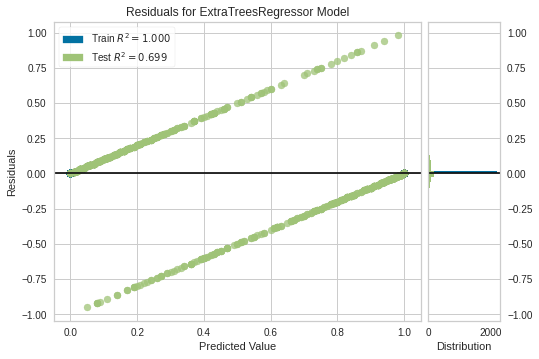

In [46]:
plot_model(et)

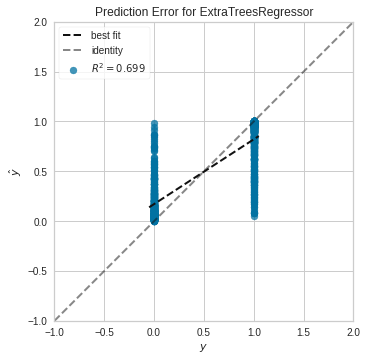

In [47]:
plot_model(et, plot='error')

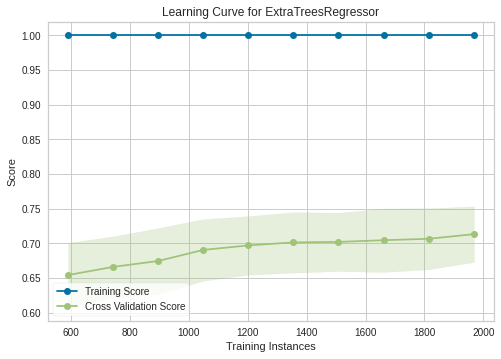

In [48]:
plot_model(et, plot='learning')

In [49]:
final_model = finalize_model(et)

In [50]:
pred = predict_model(final_model, data = X_pivot_test)

In [51]:
pred

id   sum_acc_x   sum_acc_y   sum_acc_z      sum_gy_x     sum_gy_y  \
0    3125 -611.238360  -11.744605 -139.355669  -1911.076959  1639.123438   
1    3126 -313.705824  367.296809  -42.655405 -10644.915365  4184.863263   
2    3127  304.167948  542.291164  -84.658968  -1307.846921 -1350.871152   
3    3128 -346.561617 -366.333946   18.891749    485.147442 -1790.981310   
4    3129 -443.184021  109.521180  240.781103   -858.922755   865.419381   
..    ...         ...         ...         ...           ...          ...   
777  3902 -544.379649  292.958363 -142.895722   3130.975753   731.246016   
778  3903 -365.238633  222.761433  -64.107069   3810.088754  2392.247064   
779  3904 -451.915502  119.869170  187.061223   -456.632088 -1395.398530   
780  3905  575.341801 -192.585160 -213.740440   1535.405200  -991.937287   
781  3906 -469.051442 -221.546652   84.737735  -6888.499584 -2198.564992   

        sum_gy_z  mean_acc_x  mean_acc_y  mean_acc_z  ...    std_gy_x  \
0   -1200.410049   -1.018731   -0.019574   -0.232259  ...   12.897967   
1   -2162.747150   -0.522843    0.612161   -0.071092  ...   51.625096   
2    -235.904841    0.506947    0.903819   -0.141098  ...   22.770845   
3     -14.590798   -0.577603   -0.610557    0.031486  ...   42.818157   
4    3447.298941   -0.738640    0.182535    0.401302  ...   92.301963   
..           ...         ...         ...         ...  ...         ...   
777  -257.807046   -0.907299    0.488264   -0.238160  ...  144.440736   
778  7963.284639   -0.608731    0.371269   -0.106845  ...   87.466132   
779  1161.049596   -0.753193    0.199782    0.311769  ...   45.365802   
780   559.387949    0.958903   -0.320975   -0.356234  ...   29.626394   
781 -4318.669726   -0.781752   -0.369244    0.141230  ...   64.330216   

      std_gy_y   std_gy_z  var_acc_x  var_acc_y  var_acc_z      var_gy_x  \
0    31.993022  12.251648   0.055806   0.008398   0.030510    166.357553   
1    45.706311  61.604867   0.291264   0.110899   0.147302   2665.150566   
2    13.467885  23.041463   0.048371   0.036666   0.023128    518.511372   
3    45.069932  37.967372   0.186376   0.054569   0.106647   1833.394532   
4    67.911174  43.353007   0.093512   0.098781   0.068565   8519.652350   
..         ...        ...        ...        ...        ...           ...   
777  71.579502  68.462972   0.124330   0.137249   0.044692  20863.126353   
778  57.156752  81.398849   0.440262   0.165247   0.057147   7650.324175   
779  35.970379  48.113344   0.063840   0.090332   0.065805   2058.055967   
780  43.583611  26.523530   0.027185   0.014570   0.028057    877.723193   
781  49.074290  36.491662   0.104824   0.048088   0.106358   4138.376636   

        var_gy_y     var_gy_z  Label  
0    1023.553453   150.102867   0.99  
1    2089.066820  3795.159662   0.07  
2     181.383940   530.909012   0.89  
3    2031.298793  1441.521366   0.09  
4    4611.927587  1879.483194   0.08  
..           ...          ...    ...  
777  5123.625095  4687.178521   0.17  
778  3266.894255  6625.772629   0.04  
779  1293.868192  2314.893857   0.01  
780  1899.531156   703.497641   0.99  
781  2408.285958  1331.641362   0.01  

[782 rows x 44 columns]